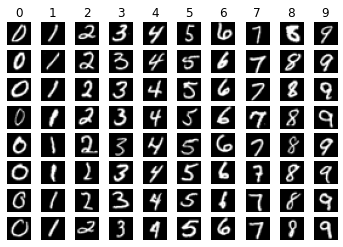

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

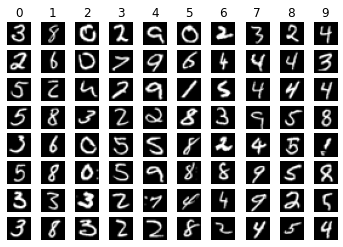

In [44]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from Handout_MNIST import MNIST
import numpy as np
from scipy.stats import norm

# load the MNIST_Light data
mnist = MNIST.MNISTData('Handout_MNIST/MNIST_Light/*/*.png')

# get_data() produces the subsets with already normalised (between 0.0 and 1.0) data
train_features, test_features, train_labels, test_labels = mnist.get_data()

# just show some of the images
mnist.visualize_random()

gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

# show the first 8 (or less) wrongly classified images for each class
mnist.visualize_wrong_class(y_pred, 8)


In [45]:
from sklearn.datasets import load_digits
import math

features_digits, labels_digits = load_digits(return_X_y = True)

n_test = math.floor(len(features_digits) * 0.7)

train_features_digits = features_digits[:n_test]
train_labels_digits = labels_digits[:n_test]
test_features_digits = features_digits[n_test:]
test_labels_digits = labels_digits[n_test:]

In [46]:
nbr_labels = 10

In [51]:
def get_stats_by_label_by_pixel(nbr_labels, train_features, train_labels):
    #Initialize data structure containing features for all samples
    values_by_labels_by_pixel = []
    for pixel_index in range(len(train_features[0])):
        values_by_labels_by_pixel.append([])

        for label_index in range(nbr_labels):
            values_by_labels_by_pixel[pixel_index].append([])

    #Populate the data structure
    for sample_index, sample_arr in enumerate(train_features):
        sample_label = train_labels[sample_index]
        
        for pixel_index, pixel in enumerate(sample_arr):
            values_by_labels_by_pixel[pixel_index][sample_label].append(pixel)

    ##
    ##
    ##

    stats_by_label_by_pixel = []
    for i in range(len(train_features[0])):
        stats_by_label_by_pixel.append([])
        
    #Calculate mean and std. dev. for each pixel
    for pixel_index, pixel_values_by_label in enumerate(values_by_labels_by_pixel):
        # print(np.array(pixel_values_by_label).shape)

        for label_index in range(len(pixel_values_by_label)):
            values = values_by_labels_by_pixel[pixel_index][label_index]
            mean = np.mean(values)
            variance = np.var(values)
            stats_by_label_by_pixel[pixel_index].append((mean, variance))

    return stats_by_label_by_pixel


In [52]:
def get_pixel__label_gaussian_probability(x, label, pixel_index, stats_by_label_by_pixel):
    # epsilon = (0.5)/16
    mean, variance = stats_by_label_by_pixel[pixel_index][label]
    variance += 0.1
    # print(stats_by_label_by_pixel[pixel_index])
    
    # upper_bound = norm.cdf(x+epsilon, mean, variance)
    # lower_bound = norm.cdf(x-epsilon, mean, variance)
    # print(mean, variance)
    # return upper_bound - lower_bound
    # print(x, mean, np.sqrt(variance))
    return norm.pdf(x, mean, np.sqrt(variance))


print(get_pixel__label_gaussian_probability(0.3, 4, 12, stats_by_label_by_pixel))

0.8044101631562491


In [53]:
def get_label_probabilities(nbr_labels, train_labels):
    label_occurences = [0 for label in range(nbr_labels)]
    for label in train_labels:
        label_occurences[label] += 1
        
    label_probabilities = [ label_occurences[label] / len(train_labels) for label in range(nbr_labels)]
    return label_probabilities

In [54]:
# print(train_features[0])
nbr_labels = 10

#stats_by_label_by_pixel = get_stats_by_label_by_pixel(nbr_labels, train_features)
    
# print(stats_by_label_by_pixel)

#  pixel0                pixel1
#  label0   label1       label0   label1
# [[ [1,2,3], [4,5,6] ], [ [7,8,9], [10,11,12] ]]
# [[(mean_0_0, var_0_0), (mean_0_1, var_0_1)], [(mean_1_0, var_1_0), (mean_1_1, var_1_1)]]

In [57]:
stats_by_label_by_pixel_digits = get_stats_by_label_by_pixel(10, train_features_digits, train_labels_digits)

def predict(x, labels):
    values = np.zeros(nbr_labels)
    priors = get_label_probabilities(nbr_labels, labels)

    for label in range(nbr_labels):
        prior = priors[label]
        values[label] = np.log2(prior)

        for pixel_index, pixel in enumerate(x):
            p_index_is_label = get_pixel__label_gaussian_probability(pixel, label, pixel_index, stats_by_label_by_pixel_digits)
            log_val = np.log2(p_index_is_label)
            values[label] += log_val
    
    # print(values)
    return np.argmax(values)
    
## Test a sample
# i = 25
# prediction = predict(train_features[i])
# print("label", train_labels[i], "prediction", prediction)
train_features_partial = train_features_digits[:500]
train_labels_partial = train_labels_digits[:500]
y_pred = []
for sample in train_features_partial:
    y_pred.append(predict(sample, train_labels_digits))

print(metrics.confusion_matrix(train_labels_partial, y_pred))
print(metrics.classification_report(train_labels_partial, y_pred))

/var/folders/wx/q78wj7fd5zggcg7ksls72sfw0000gn/T/ipykernel_2134/3712808792.py:13: RuntimeWarning: divide by zero encountered in log2
  log_val = np.log2(p_index_is_label)


[[51  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  1  4]
 [ 0  0 43  0  0  0  0  0  7  0]
 [ 0  0  0 53  0  0  0  0  0  0]
 [ 0  0  0  0 48  1  0  0  0  0]
 [ 0  0  0  1  0 47  0  0  1  1]
 [ 0  0  0  0  1  1 49  0  0  0]
 [ 0  0  0  0  1  0  0 49  0  0]
 [ 0  2  0  0  0  0  0  0 44  0]
 [ 0  0  0  2  0  0  0  5  1 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.96      0.90      0.93        52
           2       1.00      0.86      0.92        50
           3       0.95      1.00      0.97        53
           4       0.96      0.98      0.97        49
           5       0.96      0.94      0.95        50
           6       1.00      0.96      0.98        51
           7       0.91      0.98      0.94        50
           8       0.81      0.96      0.88        46
           9       0.89      0.83      0.86        48

    accuracy                           0.94       500
   macro avg       

In [58]:
stats_by_label_by_pixel = get_stats_by_label_by_pixel(10, train_features, train_labels)

def predict(x):
    values = np.zeros(nbr_labels)
    priors = get_label_probabilities(nbr_labels, train_labels)

    # print(get_pixel__label_gaussian_probability(x[45], 5, 45, stats_by_label_by_pixel))
    for label in range(nbr_labels):
        prior = priors[label]
        values[label] = np.log2(prior)

        for pixel_index, pixel in enumerate(x):
            p_index_is_label = get_pixel__label_gaussian_probability(pixel, label, pixel_index, stats_by_label_by_pixel)
            # if(p_index_is_label > 0.00001): 
            log_val = np.log2(p_index_is_label)
            values[label] += log_val
    
    # print(values)
    return np.argmax(values)
    
## Test a sample
# i = 25
# prediction = predict(train_features[i])
# print("label", train_labels[i], "prediction", prediction)
train_features_partial = train_features[:200]
train_labels_partial = train_labels[:200]
y_pred = []
for sample in train_features_partial:
    y_pred.append(predict(sample))

print(metrics.confusion_matrix(train_labels_partial, y_pred))
print(metrics.classification_report(train_labels_partial, y_pred))

[[22  0  0  1  0  0  0  0  0  1]
 [ 0 16  0  0  0  0  0  0  0  0]
 [ 1  5 11  0  0  0  1  1  2  0]
 [ 0  3  0 16  0  1  1  1  1  0]
 [ 0  3  0  0 23  0  0  0  1  2]
 [ 1  0  0  2  3 13  2  0  1  1]
 [ 0  1  0  0  0  0 18  0  0  0]
 [ 0  4  0  0  0  0  0  8  0  0]
 [ 1  4  0  1  0  0  0  0 13  2]
 [ 0  2  0  0  0  0  0  0  0 10]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.42      1.00      0.59        16
           2       1.00      0.52      0.69        21
           3       0.80      0.70      0.74        23
           4       0.88      0.79      0.84        29
           5       0.93      0.57      0.70        23
           6       0.82      0.95      0.88        19
           7       0.80      0.67      0.73        12
           8       0.72      0.62      0.67        21
           9       0.62      0.83      0.71        12

    accuracy                           0.75       200
   macro avg       